Import Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Data Exploration and Visualization:


   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628 

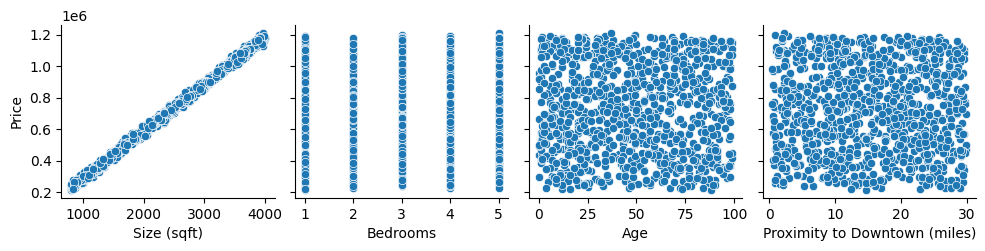

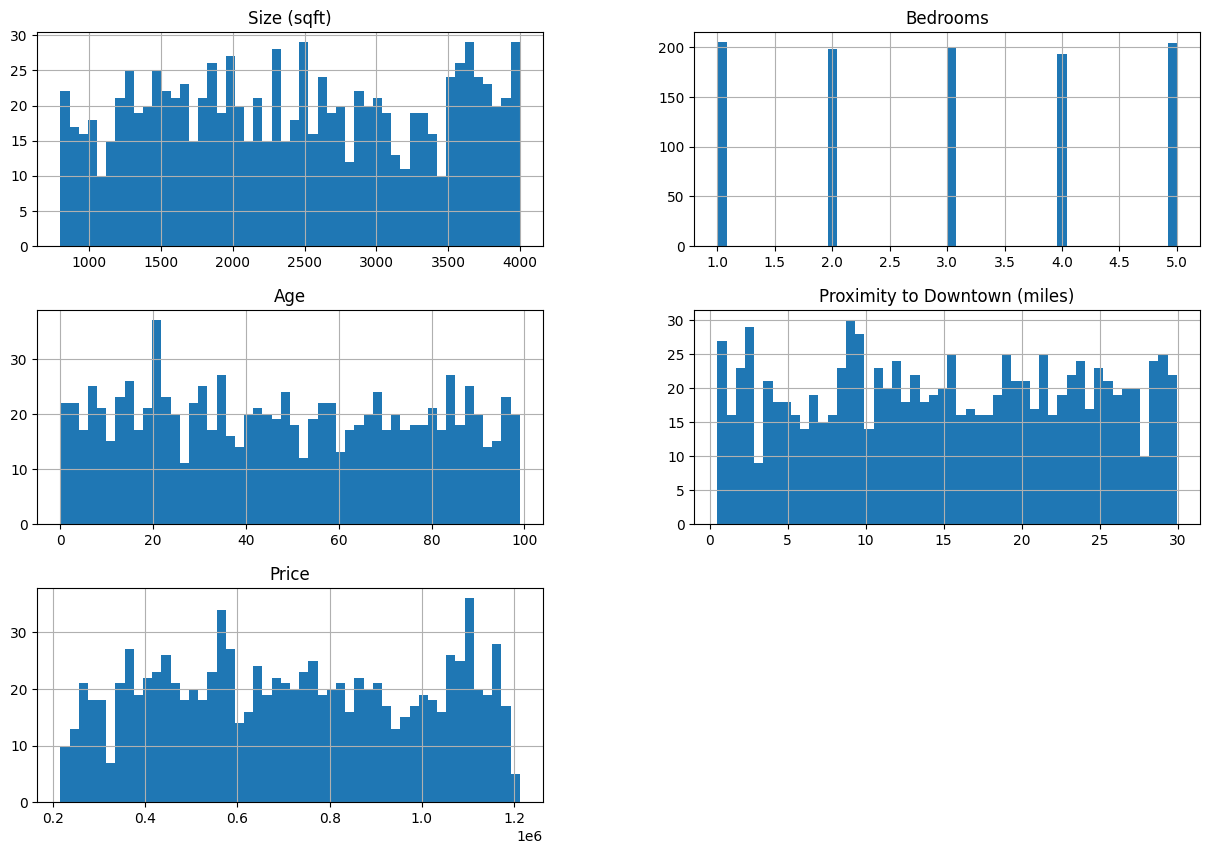

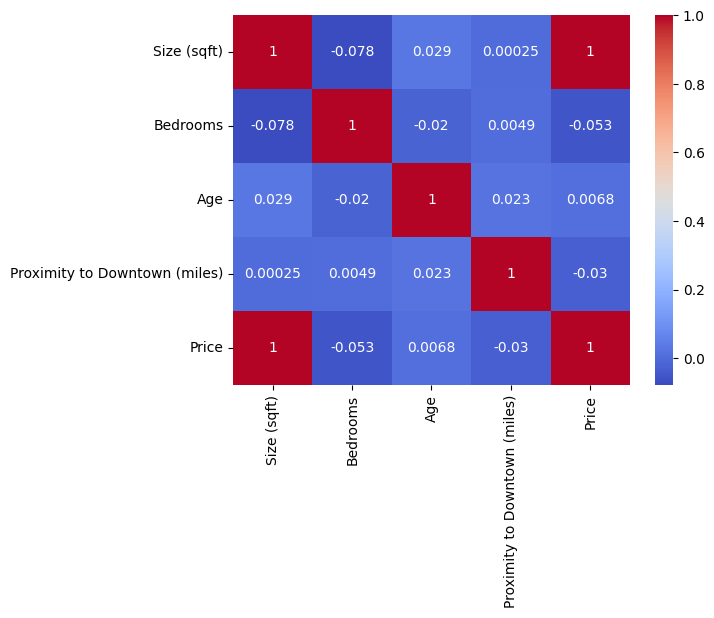

In [20]:
#Load the Dataset
data = pd.read_csv('/content/datasets_house_prices.csv')

#Explore the Dataset
print(data.head())
print(data.describe())
print(data.info())

#Visualize Relationships
#Scatter Plots
sns.pairplot(data, x_vars=['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], y_vars=['Price'])
plt.show()

#Histograms
data.hist(bins=50, figsize=(15, 10))
plt.show()

#Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

2. Data Preprocessing:


In [21]:
#Handle Missing Data
data = data.dropna()

#Normalize or Standardize Data
scaler = StandardScaler()
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
data[features] = scaler.fit_transform(data[features])

3. Model Development:

In [22]:
#Split Data into Training and Test Sets
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Implement Multiple Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4. Model Evaluation:

Mean Squared Error: 100214724.63128726
R-squared: 0.9986314443568995
                                 Coefficient
Size (sqft)                    278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


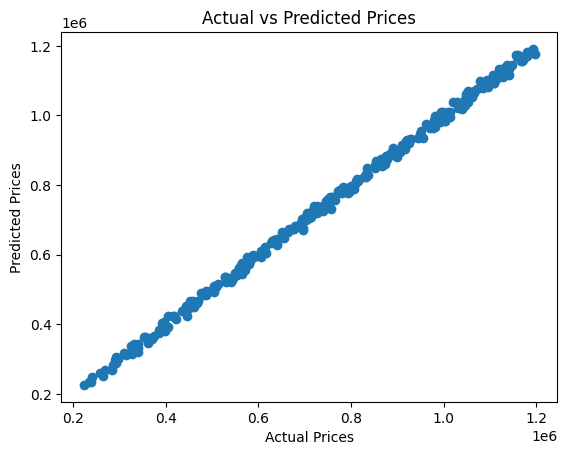

In [23]:
#Predict Prices
y_pred = model.predict(X_test)

#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Interpret Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

#Plot Predicted vs Actual Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()